# Exploratory data analysis

In [4]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
# from tensorflow.keras.preprocessing import
from sklearn.cluster import KMeans


df = pd.read_csv('https://raw.githubusercontent.com/allmeidaapedro/Churn-Prediction-Credit-Card/refs/heads/main/input/BankChurners.csv')

In [5]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [6]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [7]:
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1)

In [8]:
X = df[['Credit_Limit','Total_Revolving_Bal','Total_Trans_Amt','Total_Trans_Ct']]

Standard Scaling

In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

##  Finding K

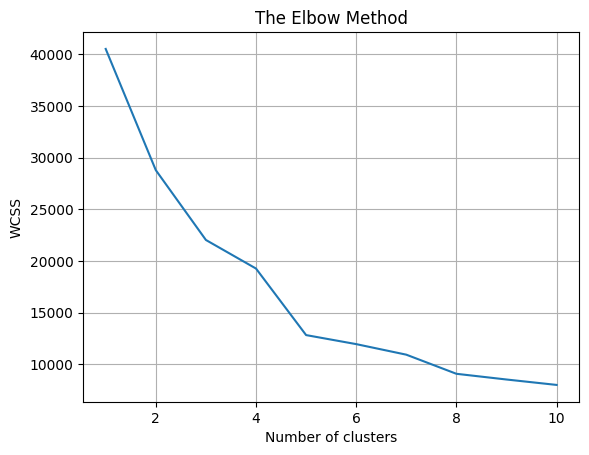

In [10]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()


# K-Means Algorithm

In [11]:
kmeans = KMeans(n_clusters=4,init='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [12]:
df['Labels'] = y_kmeans.tolist()

In [13]:
insight = df[['Credit_Limit','Total_Revolving_Bal','Total_Trans_Amt','Total_Trans_Ct']].groupby(df['Labels']).mean()
print("Insights: ",insight)

Insights:          Credit_Limit  Total_Revolving_Bal  Total_Trans_Amt  Total_Trans_Ct
Labels                                                                    
0        6578.399011          1719.850563      2282.989765       45.320368
1       29496.402662          1191.752080      5541.858569       70.638103
2        5235.574084           208.205224      3466.978969       59.729647
3        5661.641234          1539.284636      6903.076494       86.342745


In [14]:
df = pd.get_dummies(df, columns=['Marital_Status','Card_Category','Gender'])

In [15]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Labels,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Gender_F,Gender_M
0,768805383,Existing Customer,45,3,High School,$60K - $80K,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,False,True,False,False,True,False,False,False,False,True
1,818770008,Existing Customer,49,5,Graduate,Less than $40K,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,False,False,True,False,True,False,False,False,True,False
2,713982108,Existing Customer,51,3,Graduate,$80K - $120K,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,2,False,True,False,False,True,False,False,False,False,True
3,769911858,Existing Customer,40,4,High School,Less than $40K,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,False,False,False,True,True,False,False,False,True,False
4,709106358,Existing Customer,40,3,Uneducated,$60K - $80K,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,2,False,True,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,2,Graduate,$40K - $60K,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,3,False,False,True,False,True,False,False,False,False,True
10123,710638233,Attrited Customer,41,2,Unknown,$40K - $60K,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,3,True,False,False,False,True,False,False,False,False,True
10124,716506083,Attrited Customer,44,1,High School,Less than $40K,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,2,False,True,False,False,True,False,False,False,True,False
10125,717406983,Attrited Customer,30,2,Graduate,$40K - $60K,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,2,False,False,False,True,True,False,False,False,False,True


## Encoding

In [16]:
education_order = ['Unknown','Uneducated','High School', 'College', 'Graduate','Post-Graduate','Doctorate']
income_order = ['Unknown','Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K','$120K +']



In [17]:
encoder = OrdinalEncoder(categories=[education_order,income_order])
encoder.fit(df[['Education_Level','Income_Category']])
df[['Education_Level','Income_Category']] = encoder.transform(df[['Education_Level','Income_Category']])

In [18]:
le = LabelEncoder()
df['Attrition_Flag'] = le.fit_transform(df['Attrition_Flag'])


## Model Building

In [19]:
X = df.drop(['Attrition_Flag'],axis=1)
y = df['Attrition_Flag']

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

##LogisticRegression

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  float64
 5   Income_Category           10127 non-null  float64
 6   Months_on_book            10127 non-null  int64  
 7   Total_Relationship_Count  10127 non-null  int64  
 8   Months_Inactive_12_mon    10127 non-null  int64  
 9   Contacts_Count_12_mon     10127 non-null  int64  
 10  Credit_Limit              10127 non-null  float64
 11  Total_Revolving_Bal       10127 non-null  int64  
 12  Avg_Open_To_Buy           10127 non-null  float64
 13  Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 14  Total_

In [22]:
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
#Accurancy
acc = model.score(X_test,y_test)
print("Accurancy of Logistic Regression",acc)

Accurancy of Logistic Regression 0.8385982230997039


# Random Forest Classifier

In [24]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf*100}")

Random Forest Accuracy: 95.36031589338599


# XGB classifier

In [25]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb*100}")

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [12:35:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 96.44619940769991


# Artificial Neuron Network

In [26]:
model = Sequential([
    Dense(128,activation='relu',input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [28]:
model.fit(X_train,y_train,epochs=50,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7351 - loss: 3957427.2500 - val_accuracy: 0.8386 - val_loss: 433.1013
Epoch 2/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7721 - loss: 145061.9844 - val_accuracy: 0.1614 - val_loss: 2576.6350
Epoch 3/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7809 - loss: 27264.0918 - val_accuracy: 0.8386 - val_loss: 0.5878
Epoch 4/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7963 - loss: 20810.3867 - val_accuracy: 0.8386 - val_loss: 0.5414
Epoch 5/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7998 - loss: 12700.6035 - val_accuracy: 0.8386 - val_loss: 0.5086
Epoch 6/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8150 - loss: 6361.8350 - val_accuracy: 0.8386 - val_loss: 0.4864
Epoch 7/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8296 - loss: 4505.1362 - val_accuracy: 0.8386 - val_loss: 0.4703
Epoch 8/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8290

In [29]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss*100}, Test Accuracy: {accuracy*100:.2f}%')


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8567 - loss: 0.4121
Test Loss: 44.19899880886078, Test Accuracy: 83.86%
